# Project - Mathematics for Machine Learning (MA4029/2) 
## by Dennis Mitzéus, 2024

#### Applied AI - Halmstad University
___

## Project description

This project aims to introduce simple neural networks using mathematics from multivariate calculus and linear algebra. The neural network to be implemented should be a Multilayer perceptron (MLP) which should be able to take any arbitrary amounts of layers, neurons (per layer as referenced in the original project description) and an activation function (per layer also as referenced). 

To train the neural network itself, it has a training function which takes three parameters: learning rate, number of iterations and X-train & Y-train.



I went with an object oriented (OOP) approach, mostly because of its ease of scalability and makes concepts such as recursion much more simple to implement. I will be writing all class-based code as components in different `.py` files, both to optimize this Jupyter Notebook document, but also for keeping the workspace separated between executing & testing, and the logical parts, such as the neural network itself, layers, activation functions, loss function and front + back propagation logic.

All essential components for execution will be imported in the following block.
___

# Importing external components and libraries:

In [1]:
# importing external libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import math

C:\Users\wootk\AppData\Local\Temp\ipykernel_19128\3940167844.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# importing local classes and methods

In [2]:
# importing local classes and methods
from activation_functions import Linear, ReLU, Sigmoid, Tanh, Softmax
from neuralnetwork import NeuralNetwork

In [3]:
# %matplotlib inline
# %matplotlib notebook
# %matplotlib widget

___

# Create Training Data

As the instructions for this project mentions. The Neural network should be trained on three functions:

- $f(x) = e^x$
- $f(x) = \frac{sin(x)}{x}$
- $f(x, y) = sin(x) + cos(y)$

The data will be initialized below with some additional configuration parameters:

In [4]:
# [start, stop, how many points evenly distributed]
X1_config = [1, 20, 100]
X2_config = [-50, 50, 500]
X3_config = [1, 11, 30]

### For $f(x) = e^x$

(100,)
(100,)


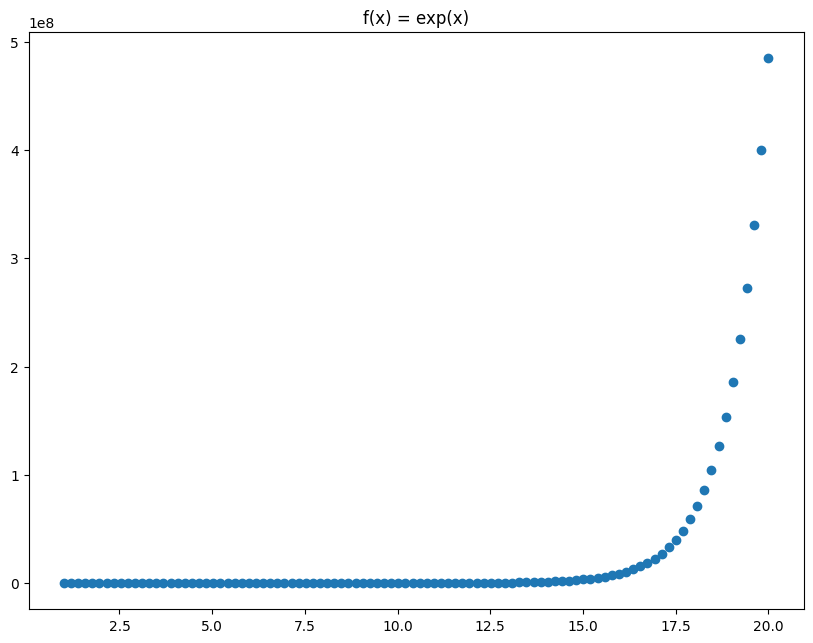

Shape of x and y train data: (60,):(60,)
Shape of x and y test data: (40,):(40,)


In [5]:
# create X and Y
X1 = np.linspace(X1_config[0], X1_config[1], X1_config[2])
Y1 = np.array([math.exp(y) for y in X1])

# print shape
print(X1.shape)
print(Y1.shape)

plt.figure(figsize=(10, 7.5))
plt.scatter(X1, Y1)
plt.title("f(x) = exp(x)")
plt.show()

# divide into train and test
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=2 / 5, shuffle=True)

print(f"Shape of x and y train data: {X1_train.shape}:{Y1_train.shape}")
print(f"Shape of x and y test data: {X1_test.shape}:{Y1_test.shape}")

In [6]:
# normalize using min-max scaling
X1_train_normalized = (X1_train - X1_train.min()) / (X1_train.max() - X1_train.min())
Y1_train_normalized = (Y1_train - Y1_train.min()) / (Y1_train.max() - Y1_train.min())
X1_test_normalized = (X1_test - X1_test.min()) / (X1_test.max() - X1_test.min())
Y1_test_normalized = (Y1_test - Y1_test.min()) / (Y1_test.max() - Y1_test.min())

# print shape
print(X1_train_normalized.shape)
print(Y1_train_normalized.shape)
print(X1_test_normalized.shape)
print(Y1_test_normalized.shape)

(60,)
(60,)
(40,)
(40,)


In [7]:
# reshape to fit model
X1_train_reshaped = np.reshape(X1_train_normalized, (len(X1_train_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
Y1_train_reshaped = np.reshape(Y1_train_normalized, (len(Y1_train_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
X1_test_reshaped = np.reshape(X1_test_normalized, (len(X1_test_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
Y1_test_reshaped = np.reshape(Y1_test_normalized, (len(Y1_test_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting

# print reshaped shape
print(X1_train_reshaped.shape)
print(Y1_train_reshaped.shape)
print(X1_test_reshaped.shape)
print(Y1_test_reshaped.shape)

(60, 1, 1)
(60, 1, 1)
(40, 1, 1)
(40, 1, 1)


### For $f(x) = \frac{sin(x)}{x}$

(500,)
(500,)


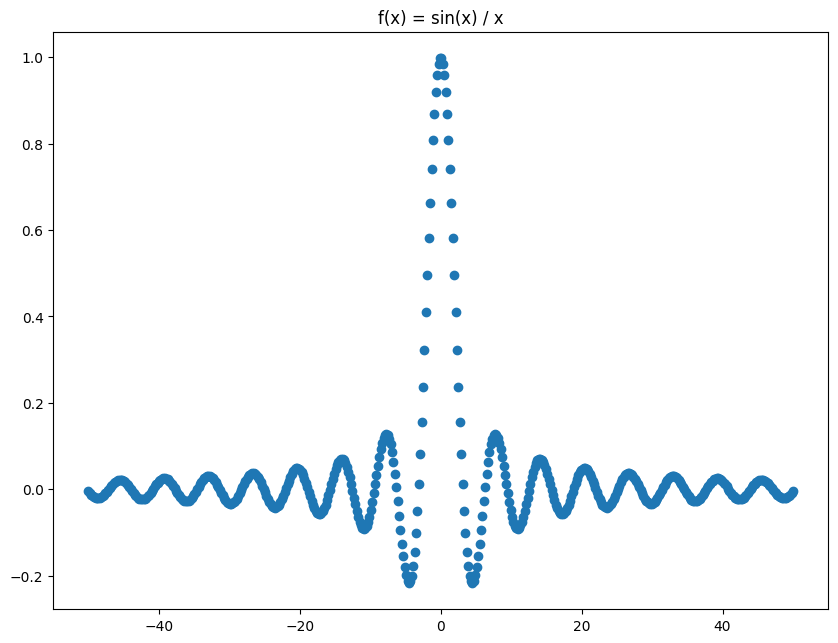

Shape of x and y train data: (300,):(300,)
Shape of x and y test data: (200,):(200,)


In [8]:
# create X and Y
X2 = np.linspace(X2_config[0], X2_config[1], X2_config[2])
Y2 = np.array([math.sin(y)/y for y in X2])

print(X2.shape)
print(Y2.shape)

plt.figure(figsize=(10, 7.5))
plt.scatter(X2, Y2)
plt.title("f(x) = sin(x) / x")
plt.show()

# divide into train and test
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=2 / 5, shuffle=True)

print(f"Shape of x and y train data: {X2_train.shape}:{Y2_train.shape}")
print(f"Shape of x and y test data: {X2_test.shape}:{Y2_test.shape}")

In [9]:
# normalize using min-max scaling
X2_train_normalized = (X2_train - X2_train.min()) / (X2_train.max() - X2_train.min())
Y2_train_normalized = (Y2_train - Y2_train.min()) / (Y2_train.max() - Y2_train.min())
X2_test_normalized = (X2_test - X2_test.min()) / (X2_test.max() - X2_test.min())
Y2_test_normalized = (Y2_test - Y2_test.min()) / (Y2_test.max() - Y2_test.min())

# print shape
print(X2_train_normalized.shape)
print(Y2_train_normalized.shape)
print(X2_test_normalized.shape)
print(Y2_test_normalized.shape)

(300,)
(300,)
(200,)
(200,)


In [10]:
# reshape to fit model
X2_train_reshaped = np.reshape(X2_train_normalized, (len(X2_train_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
Y2_train_reshaped = np.reshape(Y2_train_normalized, (len(Y2_train_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
X2_test_reshaped = np.reshape(X2_test_normalized, (len(X2_test_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
Y2_test_reshaped = np.reshape(Y2_test_normalized, (len(Y2_test_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting

# print reshaped shape
print(X2_train_reshaped.shape)
print(Y2_train_reshaped.shape)
print(X2_test_reshaped.shape)
print(Y2_test_reshaped.shape)

(300, 1, 1)
(300, 1, 1)
(200, 1, 1)
(200, 1, 1)


### For $f(x, y) = sin(x) + cos(y)$

(900, 2)
(900,)


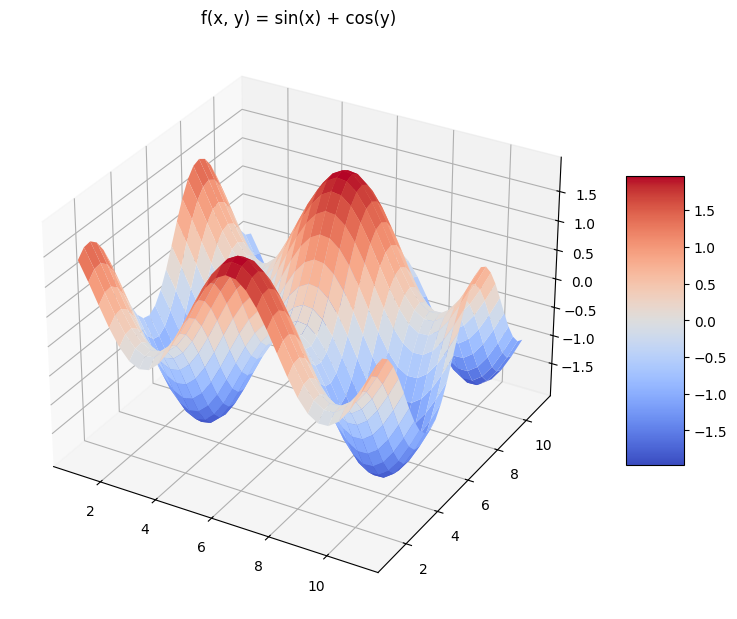

Shape of x and y train data: (540, 2):(540,)
Shape of x and y test data: (360, 2):(360,)


In [11]:
# create X 
X31 = np.linspace(X3_config[0], X3_config[1], X3_config[2])
X32 = np.linspace(X3_config[0], X3_config[1], X3_config[2])
# Y3_alt = np.array([math.sin(y) + math.cos(z) for z in X32 for y in X31])

# create X and Y with size of cartesian product of X31 and X32. (All possible combinations of arange numbers)
X3 = np.zeros([np.size(X31) * np.size(X32), 2])
Y3 = np.zeros(np.size(X31) * np.size(X32))


X31_mesh, X32_mesh = np.meshgrid(X31, X32)

# fill out X and Y
counter = 0
for j in range(len(X31)):
    for i in range(len(X32)):
        Y3[counter] = math.sin(X32[i]) + math.cos(X31[j]) # creating Y 
        X3[counter, :] = [X31[j], X32[i]]
        counter += 1

print(X3.shape)
print(Y3.shape)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7.5))
X31, X32 = np.meshgrid(X31, X32)
Y3_mesh = np.sin(X32_mesh) + np.cos(X31_mesh)

surf = ax.plot_surface(X31, X32, Y3_mesh, cmap=cm.coolwarm, antialiased=True, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("f(x, y) = sin(x) + cos(y)")
plt.show()


X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=2 / 5, shuffle=True)

print(f"Shape of x and y train data: {X3_train.shape}:{Y3_train.shape}")
print(f"Shape of x and y test data: {X3_test.shape}:{Y3_test.shape}")

In [12]:
# normalize using min-max scaling
X3_train_normalized = (X3_train - X3_train.min()) / (X3_train.max() - X3_train.min())
Y3_train_normalized = (Y3_train - Y3_train.min()) / (Y3_train.max() - Y3_train.min())
X3_test_normalized = (X3_test - X3_test.min()) / (X3_test.max() - X3_test.min())
Y3_test_normalized = (Y3_test - Y3_test.min()) / (Y3_test.max() - Y3_test.min())

# print shape
print(X3_train_normalized.shape)
print(Y3_train_normalized.shape)
print(X3_test_normalized.shape)
print(Y3_test_normalized.shape)

(540, 2)
(540,)
(360, 2)
(360,)


In [13]:
# reshape to fit model
X3_train_reshaped = np.reshape(X3_train_normalized, (len(X3_train_normalized), 2, 1)) # rows * input size (feat) * dim for broadcasting
Y3_train_reshaped = np.reshape(Y3_train_normalized, (len(Y3_train_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting
X3_test_reshaped = np.reshape(X3_test_normalized, (len(X3_test_normalized), 2, 1)) # rows * input size (feat) * dim for broadcasting
Y3_test_reshaped = np.reshape(Y3_test_normalized, (len(Y3_test_normalized), 1, 1)) # rows * input size (feat) * dim for broadcasting

# print reshaped shape
print(X3_train_reshaped.shape)
print(Y3_train_reshaped.shape)
print(X3_test_reshaped.shape)
print(Y3_test_reshaped.shape)

(540, 2, 1)
(540, 1, 1)
(360, 2, 1)
(360, 1, 1)


# Run Neural Network for validation Dataset XOR

In [14]:
skip_validation = False

Training...:   0%|          | 0/20000 [00:00<?, ?it/s]

1/20000, error=0.3132213660771088
2/20000, error=0.30501141225901635
3/20000, error=0.2974757423868373
4/20000, error=0.29071368385719093
5/20000, error=0.28477434065185064
6/20000, error=0.27965905796579715
7/20000, error=0.27532992342729734
8/20000, error=0.27172135437180245
9/20000, error=0.26875192170641
10/20000, error=0.2663344401313629
11/20000, error=0.2643834235017465
12/20000, error=0.26281985252767837
13/20000, error=0.26157368863990693
14/20000, error=0.26058473949446853
15/20000, error=0.2598024550180359
16/20000, error=0.25918511654987036
17/20000, error=0.258698746877059
18/20000, error=0.2583159514152883
19/20000, error=0.25801481214195576
20/20000, error=0.2577778953218389
21/20000, error=0.25759139592417657
22/20000, error=0.2574444195128541
23/20000, error=0.25732839085990755
24/20000, error=0.25723657354746293
25/20000, error=0.2571636836248072
26/20000, error=0.2571055812029507
27/20000, error=0.25705902561938876
28/20000, error=0.25702148186857626
29/20000, error=

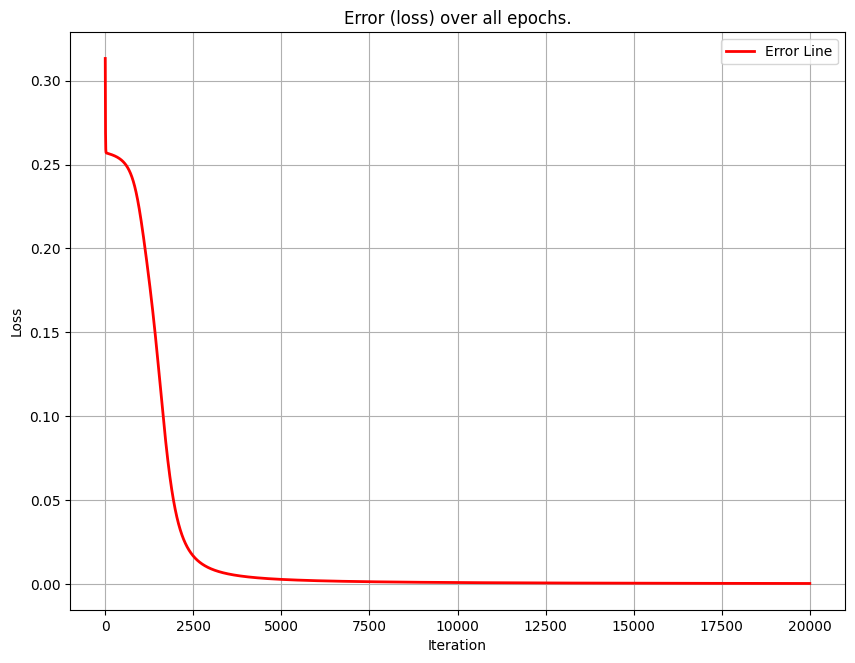

In [15]:
if skip_validation == False:
    # Simple XOR validation dataset
    X_val = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
    Y_val = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

    # init
    NN_val = NeuralNetwork()
    NN_val.fit(X_val, Y_val)

    # config
    val_no_neurons = [3, 1]
    val_activations = [Sigmoid, Sigmoid]
    val_learning_rate = 0.1
    val_epochs = 20000

    NN_val.init_config(val_no_neurons, val_activations, val_learning_rate)

    # train
    NN_val.train(val_epochs, print_live_error=True)

    # val error
    NN_val.show_trained_error()

___

# Initialize Neural Network

In [16]:
NN_XY1 = NeuralNetwork() # for exp(x)
NN_XY2 = NeuralNetwork() # for f(x) = sin(x) / x
NN_XY3 = NeuralNetwork() # for f(x, y) = sin(x) + cos(y)

# Fit

In [17]:
NN_XY1.fit(X1_train_reshaped, Y1_train_reshaped)
NN_XY2.fit(X2_train_reshaped, Y2_train_reshaped)
NN_XY3.fit(X3_train_reshaped, Y3_train_reshaped)

# Training Configuration

In [18]:
XY1_no_neurons = [3, 1]
XY1_activations = [Sigmoid, Sigmoid]
XY1_learning_rate = 0.02
XY1_epochs = 20000 # current optimal: 20 000

NN_XY1.init_config(XY1_no_neurons, XY1_activations, XY1_learning_rate)


XY2_no_neurons = [48, 32, 32, 1]
XY2_activations = [Sigmoid, Sigmoid, Sigmoid, Sigmoid]
XY2_learning_rate = 0.5
XY2_epochs = 50000 # current optimal: 50 000

NN_XY2.init_config(XY2_no_neurons, XY2_activations, XY2_learning_rate)


XY3_no_neurons = [12, 1]
XY3_activations = [Sigmoid, Sigmoid]
XY3_learning_rate = 0.1
XY3_epochs = 10000 # current optimal: 10 000

NN_XY3.init_config(XY3_no_neurons, XY3_activations, XY3_learning_rate)

___

# Training

In [19]:
NN_XY1.train(XY1_epochs, print_live_error=False) # prints error for each epoch live instead of with method NN.print_trained_error()
NN_XY2.train(XY2_epochs, print_live_error=False)
NN_XY3.train(XY3_epochs, print_live_error=False)

Training...:   0%|          | 0/20000 [00:00<?, ?it/s]

Training...:   0%|          | 0/50000 [00:00<?, ?it/s]

Training...:   0%|          | 0/10000 [00:00<?, ?it/s]

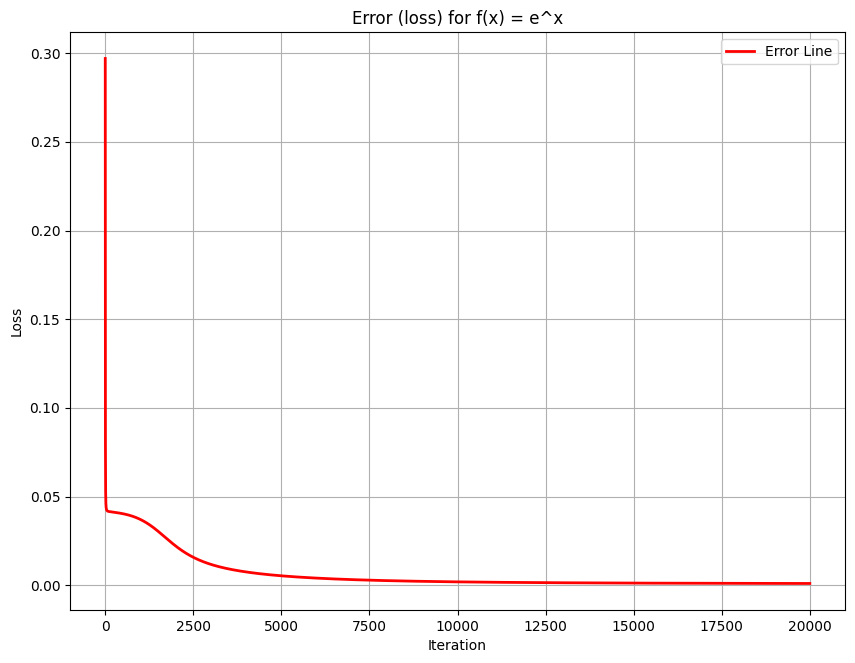

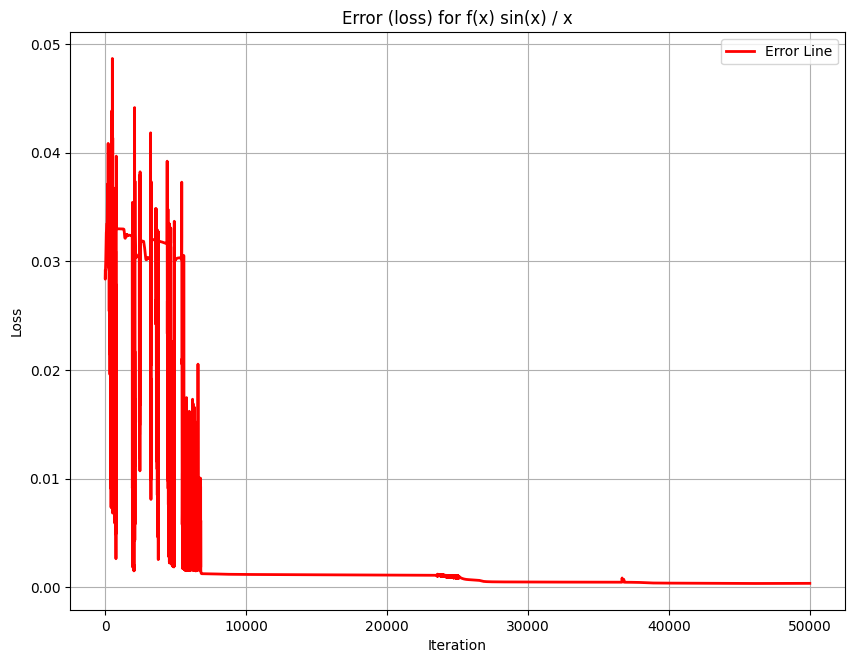

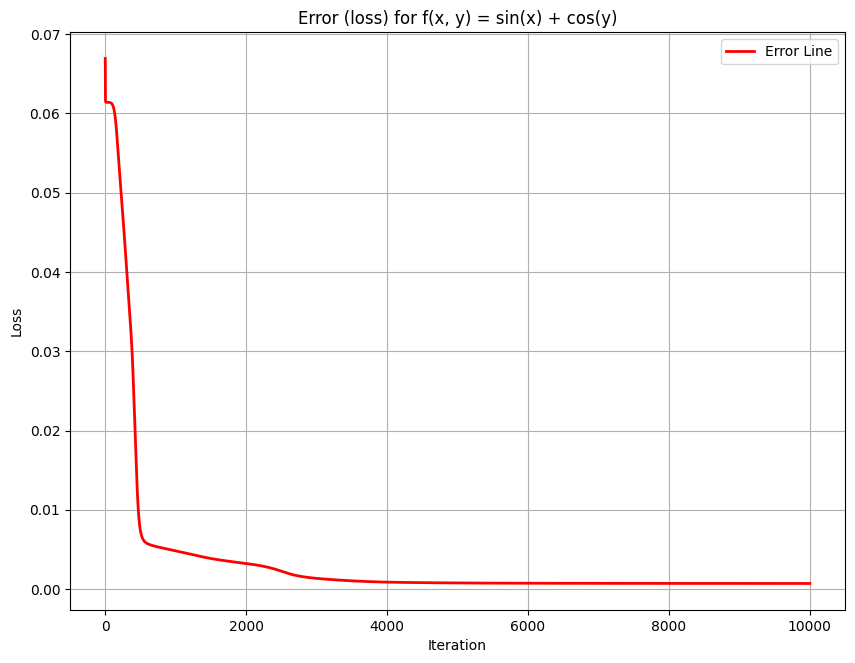

In [20]:
NN_XY1.show_trained_error(title="Error (loss) for f(x) = e^x")
NN_XY2.show_trained_error(title="Error (loss) for f(x) sin(x) / x")
NN_XY3.show_trained_error(title="Error (loss) for f(x, y) = sin(x) + cos(y)")

In [21]:
NN_XY1.print_trained_error()

1/20000, error=0.2970357540121317
2/20000, error=0.20573338966869642
3/20000, error=0.14795773614992205
4/20000, error=0.11353822374162117
5/20000, error=0.09268499868807639
6/20000, error=0.07947767504268775
7/20000, error=0.070702668787224
8/20000, error=0.06461430638497502
9/20000, error=0.06023022235328656
10/20000, error=0.05697295429038299
11/20000, error=0.0544882211573822
12/20000, error=0.05255001631807741
13/20000, error=0.051009075701484004
14/20000, error=0.04976376258326705
15/20000, error=0.04874298743216655
16/20000, error=0.04789583669286322
17/20000, error=0.047185075823607314
18/20000, error=0.046582963404492674
19/20000, error=0.04606848519381613
20/20000, error=0.045625484338706813
21/20000, error=0.045241371103207494
22/20000, error=0.04490621573656072
23/20000, error=0.04461209980367754
24/20000, error=0.04435264510704235
25/20000, error=0.04412266670432669
26/20000, error=0.04391791399055924
27/20000, error=0.04373487517039184
28/20000, error=0.043570627962249905

In [22]:
NN_XY2.print_trained_error()

1/50000, error=0.029114021200880743
2/50000, error=0.028359610677014063
3/50000, error=0.02837775589145055
4/50000, error=0.028472149948392107
5/50000, error=0.028568307003622267
6/50000, error=0.02866087388904022
7/50000, error=0.028749644234569008
8/50000, error=0.028833453343093632
9/50000, error=0.02891026174453245
10/50000, error=0.028979327860129522
11/50000, error=0.029042428401395693
12/50000, error=0.029103215436129565
13/50000, error=0.029165775157418607
14/50000, error=0.029232800743975235
15/50000, error=0.02930358824048011
16/50000, error=0.029373695668869763
17/50000, error=0.02943772468016825
18/50000, error=0.029492564335802
19/50000, error=0.029537969333228994
20/50000, error=0.029575284009864734
21/50000, error=0.02960624565828444
22/50000, error=0.02963242872306032
23/50000, error=0.02965510548375143
24/50000, error=0.029675272290431185
25/50000, error=0.029693719016616504
26/50000, error=0.029711099805455318
27/50000, error=0.02972799650262521
28/50000, error=0.0297

In [23]:
NN_XY3.print_trained_error()

1/10000, error=0.06693182206065786
2/10000, error=0.06356608974306863
3/10000, error=0.062264557231510004
4/10000, error=0.06175436710149508
5/10000, error=0.061554876834789385
6/10000, error=0.061475324923617375
7/10000, error=0.06144220517198837
8/10000, error=0.061427379640933345
9/10000, error=0.06141998554046402
10/10000, error=0.061415749233701765
11/10000, error=0.06141294283828593
12/10000, error=0.06141084283463219
13/10000, error=0.06140913306253361
14/10000, error=0.06140766821932927
15/10000, error=0.06140637746298245
16/10000, error=0.06140522377001812
17/10000, error=0.06140418613482553
18/10000, error=0.061403251449227154
19/10000, error=0.061402410642552314
20/10000, error=0.061401656773411147
21/10000, error=0.061400984052142435
22/10000, error=0.06140038732430983
23/10000, error=0.06139986179061549
24/10000, error=0.061399402851719916
25/10000, error=0.06139900602073096
26/10000, error=0.06139866687310767
27/10000, error=0.06139838101758791
28/10000, error=0.061398144

___

# Creating summarizing error dictionary

In [24]:
network_errors = {
    "XY1": {
        "train_MSE": None,
        "train_MAE": None,
        "test_MSE": None,
        "test_MAE": None
    },
    "XY2": {
        "train_MSE": None,
        "train_MAE": None,
        "test_MSE": None,
        "test_MAE": None
    },
    "XY3": {
        "train_MSE": None,
        "train_MAE": None,
        "test_MSE": None,
        "test_MAE": None
    }
}

___

# Testing on train data

In [25]:
NN_XY1.test(X1_train_reshaped, Y1_train_reshaped)
NN_XY2.test(X2_train_reshaped, Y2_train_reshaped)
NN_XY3.test(X3_train_reshaped, Y3_train_reshaped)

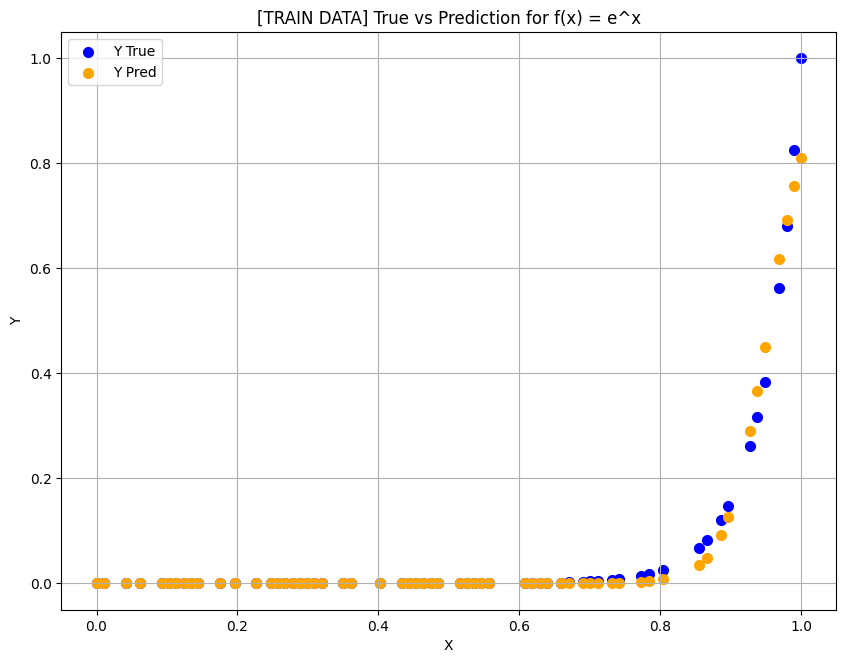

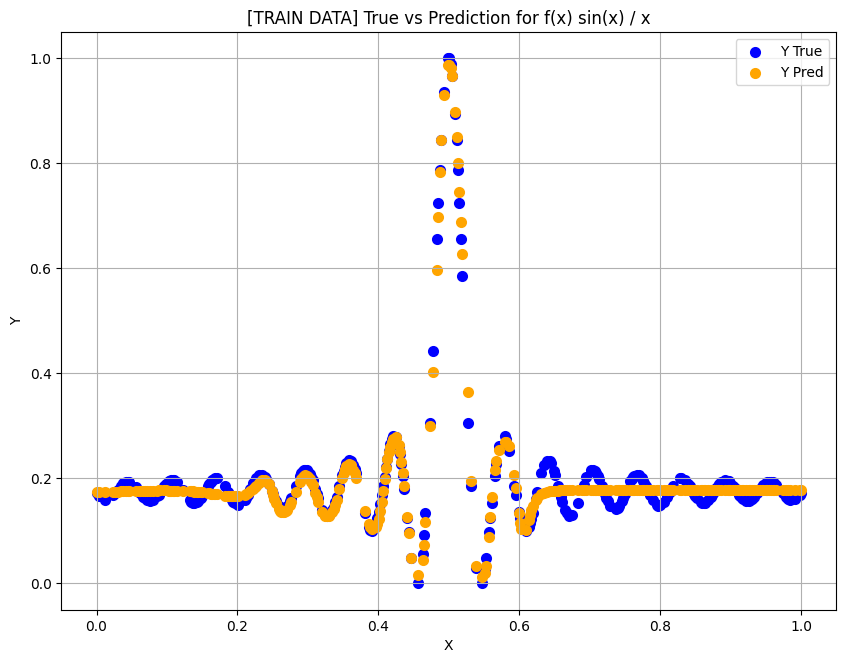

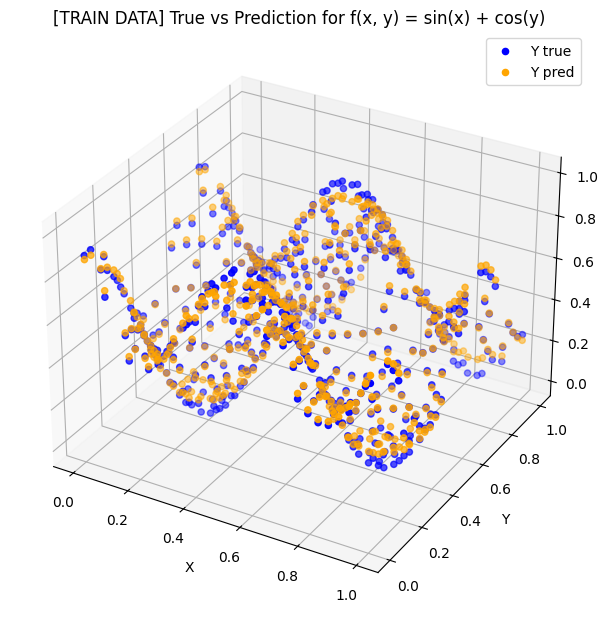

In [26]:
NN_XY1.show_test_results(title="[TRAIN DATA] True vs Prediction for f(x) = e^x")
NN_XY2.show_test_results(title="[TRAIN DATA] True vs Prediction for f(x) sin(x) / x")
NN_XY3.show_test_results(title="[TRAIN DATA] True vs Prediction for f(x, y) = sin(x) + cos(y)")

In [27]:
network_errors["XY1"]["train_MSE"] = NN_XY1.network_accuracy_mean_squared_error
network_errors["XY1"]["train_MAE"] = NN_XY1.network_accuracy_error
network_errors["XY2"]["train_MSE"] = NN_XY2.network_accuracy_mean_squared_error
network_errors["XY2"]["train_MAE"] = NN_XY2.network_accuracy_error
network_errors["XY3"]["train_MSE"] = NN_XY3.network_accuracy_mean_squared_error
network_errors["XY3"]["train_MAE"] = NN_XY3.network_accuracy_error

___

# Statistics for train data

In [28]:
NN_XY1.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 2x[3, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid']
        Network learning rate: 0.02
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 57.81s
        Network total amount of epochs: 20000
        Network total amount of parameters: 10
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.010988893762415613
        Network Trained Mean Squared Error: 0.000933997342898139



In [29]:
NN_XY2.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 4x[48, 32, 32, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid', 'Sigmoid', 'Sigmoid']
        Network learning rate: 0.5
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 1307.98s
        Network total amount of epochs: 50000
        Network total amount of parameters: 2753
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.013621574633875708
        Network Trained Mean Squared Error: 0.0003138632228591985



In [30]:
NN_XY3.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 2x[12, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid']
        Network learning rate: 0.1
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 252.24s
        Network total amount of epochs: 10000
        Network total amount of parameters: 49
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.020356083647980017
        Network Trained Mean Squared Error: 0.0007142555948538289



___

# Testing on test data

In [31]:
NN_XY1.test(X1_test_reshaped, Y1_test_reshaped)
NN_XY2.test(X2_test_reshaped, Y2_test_reshaped)
NN_XY3.test(X3_test_reshaped, Y3_test_reshaped)

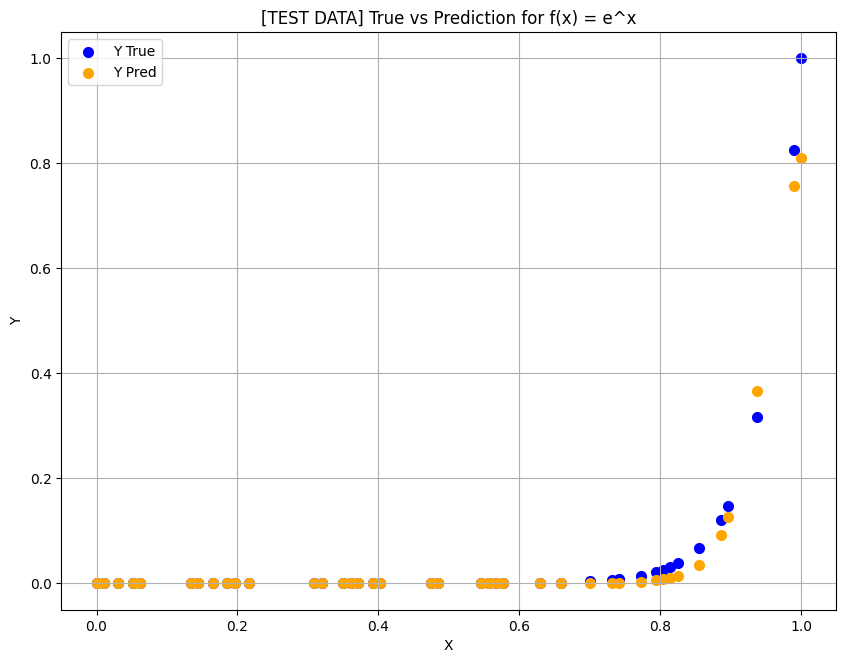

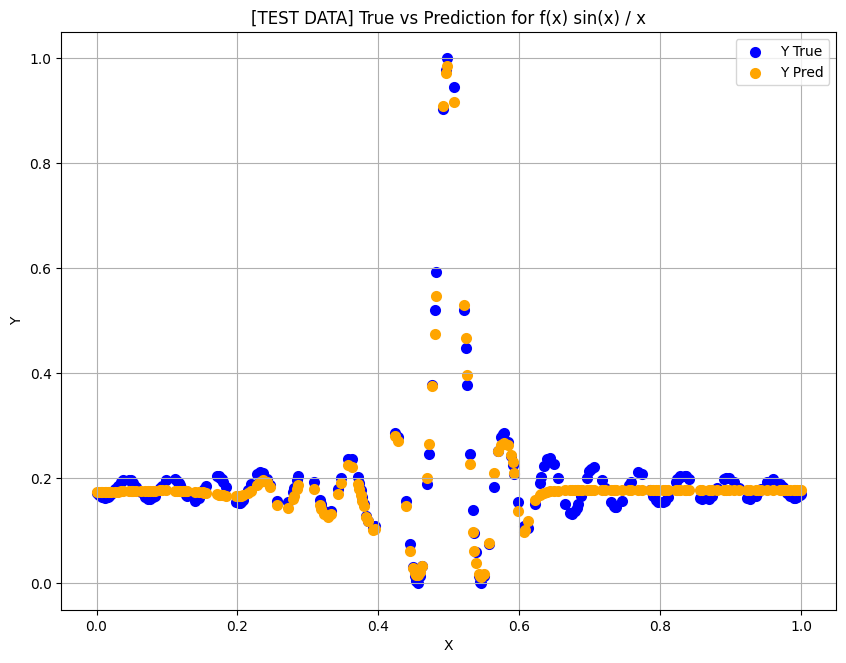

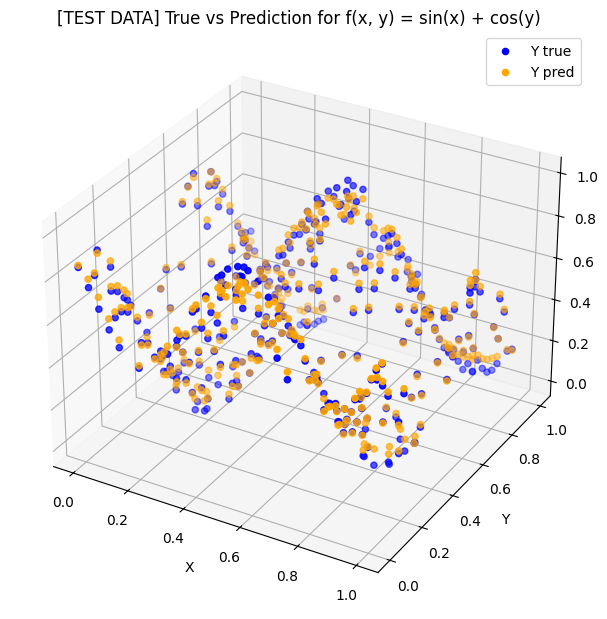

In [32]:
NN_XY1.show_test_results(title="[TEST DATA] True vs Prediction for f(x) = e^x")
NN_XY2.show_test_results(title="[TEST DATA] True vs Prediction for f(x) sin(x) / x")
NN_XY3.show_test_results(title="[TEST DATA] True vs Prediction for f(x, y) = sin(x) + cos(y)")

In [33]:
network_errors["XY1"]["test_MSE"] = NN_XY1.network_accuracy_mean_squared_error
network_errors["XY1"]["test_MAE"] = NN_XY1.network_accuracy_error
network_errors["XY2"]["test_MSE"] = NN_XY2.network_accuracy_mean_squared_error
network_errors["XY2"]["test_MAE"] = NN_XY2.network_accuracy_error
network_errors["XY3"]["test_MSE"] = NN_XY3.network_accuracy_mean_squared_error
network_errors["XY3"]["test_MAE"] = NN_XY3.network_accuracy_error

___

# Statistics for test data

In [34]:
NN_XY1.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 2x[3, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid']
        Network learning rate: 0.02
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 57.81s
        Network total amount of epochs: 20000
        Network total amount of parameters: 10
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.012503322037096153
        Network Trained Mean Squared Error: 0.0007900043517564731



In [35]:
NN_XY2.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 4x[48, 32, 32, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid', 'Sigmoid', 'Sigmoid']
        Network learning rate: 0.5
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 1307.98s
        Network total amount of epochs: 50000
        Network total amount of parameters: 2753
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.015673038433391972
        Network Trained Mean Squared Error: 0.00025551097947090133



In [36]:
NN_XY3.show_stats()

Current Neural Network Configuration:
              
        Network dimension (layers x neurons): 2x[12, 1]
        Network activation functions: ['Sigmoid', 'Sigmoid']
        Network learning rate: 0.1
        Network is trained: Yes
        Network is tested: Yes

        Network train time: 252.24s
        Network total amount of epochs: 10000
        Network total amount of parameters: 49
        Network loss history exists: Yes


        Network Trained Mean Absolute Error: 0.02114472178012042
        Network Trained Mean Squared Error: 0.0005231617938591207



___

# Summarizing Table

In [37]:
indexes = ["f(x) = e^x", "f(x) sin(x) / x", "f(x, y) = sin(x) + cos(y)"]
data = {
    "Training Mean Squared Error": [network_errors["XY1"]["train_MSE"], network_errors["XY2"]["train_MSE"], network_errors["XY3"]["train_MSE"]],
    "Training Mean Absolute Error": [network_errors["XY1"]["train_MAE"], network_errors["XY2"]["train_MAE"], network_errors["XY3"]["train_MAE"]],
    "Testing Mean Squared Error": [network_errors["XY1"]["test_MSE"], network_errors["XY2"]["test_MSE"], network_errors["XY3"]["test_MSE"]],
    "Testing Mean Absolute Error": [network_errors["XY1"]["test_MAE"], network_errors["XY2"]["test_MAE"], network_errors["XY3"]["test_MAE"]],
}

sum_table = pd.DataFrame(data)
sum_table.index = indexes



display(sum_table)

Training Mean Squared Error  \
f(x) = e^x                                    0.000934   
f(x) sin(x) / x                               0.000314   
f(x, y) = sin(x) + cos(y)                     0.000714   

                           Training Mean Absolute Error  \
f(x) = e^x                                     0.010989   
f(x) sin(x) / x                                0.013622   
f(x, y) = sin(x) + cos(y)                      0.020356   

                           Testing Mean Squared Error  \
f(x) = e^x                                   0.000790   
f(x) sin(x) / x                              0.000256   
f(x, y) = sin(x) + cos(y)                    0.000523   

                           Testing Mean Absolute Error  
f(x) = e^x                                    0.012503  
f(x) sin(x) / x                               0.015673  
f(x, y) = sin(x) + cos(y)                     0.021145